# Analysis of the Results from the Stationary Environment

In [1]:
from copy import deepcopy

from src.reinforcement_learning.experiments.detailed_experiment_runner import DetailedExperimentRunner
from src.visualization.experiments.detailed_experiment_visualizer import DetailedExperimentVisualizer

from experiments.plotting_variables import *
from experiments.pain_models import NORMAL_PAIN_PROBABILITIES, CHRONIC_PAIN_PROBABILITIES

experiment = ("stationary")
root_folder = "../"
create_plots_for_best_params = False
num_trials_for_plot_creation = 300
plot_save_directory = "analysis_plots"

In [2]:
normal_pain_model = NORMAL_PAIN_PROBABILITIES
chronic_pain_model = CHRONIC_PAIN_PROBABILITIES

def create_param_config_with_pandas_series_params(param_map, num_trials, pandas_series):
    param_map = deepcopy(param_map)
    agent_params = param_map["agent_params"]
    agent_params["w1"] = pandas_series["w1"]
    agent_params["w2"] = pandas_series["w2"]
    agent_params["w3"] = pandas_series["w3"]
    agent_params["w4"] = pandas_series["w4"]
    agent_params["aspiration_level"] = pandas_series["roh"]
    if "alpha" in pandas_series.index:
        agent_params["alpha"] = pandas_series["alpha"]
    if "epsilon" in pandas_series.index:
        agent_params["epsilon"] = pandas_series["epsilon"]

    if pandas_series["pain_model"] == "normal":
        agent_params["pain_model"] = normal_pain_model
    if pandas_series["pain_model"] == "chronic":
        agent_params["pain_model"] = chronic_pain_model

    param_map["experiment_params"]["num_experiments"] = num_trials
    param_map["agent_params"] = agent_params
    return param_map

In [3]:
import pandas as pd
import json

#Add config path
with open(root_folder + experiment + "/base_config.json") as file:
    base_config = json.load(file)

list_of_best_pandas_series = []

#Add results path
df = pd.read_csv(root_folder + experiment + "/results_" + experiment + ".csv")
df = df.rename(columns={"agent_params.w1": "w1",
                        "agent_params.w2": "w2",
                        "agent_params.w3": "w3",
                        "agent_params.w4": "w4",
                        "agent_params.pain_model": "pain_model",
                        "agent_params.aspiration_level": "roh",
                        "agent_params.alpha": "alpha",
                        "agent_params.epsilon": "epsilon",
                        "mean_result": "mean",
                        "std_result": "std"})
df = df.sort_values("mean", ascending=False)
print(df.shape)
df.head()

(312130, 11)


,alpha,roh,epsilon,pain_model,w1,w2,w3,w4,experiment_name,mean,std
2809,0.1,0.01,0.01,normal,0.7,0.3,0.3,0.7,experiment_6b574f17-1304-4157-b2d3-c478b652b982,2310.563333,62.516454
13397,0.1,0.01,0.01,normal,1.0,0.3,0.3,0.7,experiment_f7c02f9e-1656-4389-8ea4-1e2c595ba861,2310.563333,62.516454
13103,0.1,0.01,0.01,normal,0.9,0.3,0.3,0.7,experiment_e9920e0a-85b6-490d-9fbd-35901158e334,2310.563333,62.516454
2515,0.1,0.01,0.01,normal,0.5,0.3,0.3,0.7,experiment_8cf12036-740c-4dc1-9c0b-8483dc528406,2310.556667,62.522719
289557,0.1,0.01,0.01,normal,0.1,0.3,0.3,0.7,experiment_bed6f4dc-5ccb-4a34-8196-a7b4cec89026,2310.556667,62.522719


In [4]:


def save_plots(pandas_series):
    param_map = create_param_config_with_pandas_series_params(base_config, num_trials_for_plot_creation, pandas_series)
    runner = DetailedExperimentRunner(param_map)
    results = runner.run_experiment()
    visualizer = DetailedExperimentVisualizer(param_map, results, root_folder + experiment + "/" + plot_save_directory + "/summaries")
    visualizer.save_results_plot()
    return visualizer

def get_experiment_visualizer(pandas_series):
    param_map = create_param_config_with_pandas_series_params(base_config, num_trials_for_plot_creation, pandas_series)
    runner = DetailedExperimentRunner(param_map)
    results = runner.run_experiment()
    return DetailedExperimentVisualizer(param_map, results, root_folder + experiment + "/" + plot_save_directory)



## Objective Only and Objective + Pain

In [5]:
df_obj = df[(df["w1"] > 0) &( df["w2"] == 0) & (df["w3"] == 0)]
df_obj_without_w4 = df_obj[df_obj["w4"] == 0]
df_obj_with_w4 = df_obj[df_obj["w4"] > 0]
print("Objective")
print(df_obj_without_w4.head())
print("\nObjective + Pain")
print(df_obj_with_w4.head())

Objective
       alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
44880    0.9  0.0      0.1     normal  0.9  0.0  0.0  0.0   
44831    0.9  0.0      0.1     normal  0.7  0.0  0.0  0.0   
44929    0.9  0.0      0.1     normal  1.0  0.0  0.0  0.0   
44684    0.9  0.0      0.1     normal  0.1  0.0  0.0  0.0   
44782    0.9  0.0      0.1     normal  0.5  0.0  0.0  0.0   

                                       experiment_name     mean         std  
44880  experiment_ea617b97-b973-419e-a9b2-20866ffd991b  1858.57  338.720194  
44831  experiment_bb2e7b50-d79c-4898-a51f-8549f4fde6b4  1858.57  338.720194  
44929  experiment_df4f1ad3-5c97-4940-8794-173650e28a2b  1858.57  338.720194  
44684  experiment_1e9c91dc-2014-461c-981f-d646f1421a55  1858.57  338.720194  
44782  experiment_7cc46bf7-b2ef-46dd-820f-883a28c9ec3f  1858.57  338.720194  

Objective + Pain
       alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
91127    0.7  0.0     0.01     normal  0.1  0.0  0.0  1.0   
32553    0.9  0

In [6]:
best_obj_without_w4 = df_obj_without_w4.iloc[0]
best_obj_with_w4 = df_obj_with_w4.iloc[0]
print("Best Obj")
print(best_obj_without_w4)
list_of_best_pandas_series.append(best_obj_without_w4)

Best Obj
alpha                                                          0.9
roh                                                            0.0
epsilon                                                        0.1
pain_model                                                  normal
w1                                                             0.9
w2                                                             0.0
w3                                                             0.0
w4                                                             0.0
experiment_name    experiment_ea617b97-b973-419e-a9b2-20866ffd991b
mean                                                       1858.57
std                                                     338.720194
Name: 44880, dtype: object


In [7]:
print("Best Obj + Pain")
print(best_obj_with_w4)
list_of_best_pandas_series.append(best_obj_with_w4)

Best Obj + Pain
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.0
w3                                                             0.0
w4                                                             1.0
experiment_name    experiment_d5000791-13b7-45da-9e08-573e4ebe42c5
mean                                                   2279.463333
std                                                      69.272826
Name: 91127, dtype: object


In [8]:
if best_obj_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_obj_with_w4_other = df_obj_with_w4[df_obj_with_w4["pain_model"] == other_pain_model]
best_obj_with_w4_other = df_obj_with_w4_other.iloc[0]
print("Best Obj + Pain (other)")
print(best_obj_with_w4_other)
list_of_best_pandas_series.append(best_obj_with_w4_other)

Best Obj + Pain (other)
alpha                                                          0.9
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.1
w2                                                             0.0
w3                                                             0.0
w4                                                             0.1
experiment_name    experiment_15e8cc46-e064-47f3-a079-d3d6164e970d
mean                                                   2266.293333
std                                                       68.49608
Name: 5246, dtype: object


## Expect Only and Expect + Pain

In [9]:
df_exp = df[(df["w1"] == 0) &( df["w2"] > 0) & (df["w3"] == 0)]
df_exp_without_w4 = df_exp[df_exp["w4"] == 0]
df_exp_with_w4 = df_exp[df_exp["w4"] > 0]
print("Expect")
print(df_exp_without_w4.head())
print("\nExpect + Pain")
print(df_exp_with_w4.head())

Expect
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
91107     0.7  0.0     0.01     normal  0.0  0.9  0.0  0.0   
91114     0.7  0.0     0.01     normal  0.0  1.0  0.0  0.0   
294797    0.5  0.0     0.01     normal  0.0  0.5  0.0  0.0   
32505     0.9  0.0     0.01     normal  0.0  0.1  0.0  0.0   
278885    0.3  0.0     0.01     normal  0.0  0.9  0.0  0.0   

                                        experiment_name         mean  \
91107   experiment_ee5bb7c7-821e-4913-9bac-fb7aba5f8745  1973.136667   
91114   experiment_8dbbe08c-7614-4a6e-b01c-385e188c2e9a  1972.773333   
294797  experiment_51e92453-1510-4f20-8d42-43f88c2c3757  1972.580000   
32505   experiment_51ba06fd-559a-45b4-aa74-e422f7221034  1972.580000   
278885  experiment_99aa884e-c26f-414b-9c8a-78fe4d51ca1c  1972.580000   

               std  
91107   384.974070  
91114   384.867838  
294797  384.890529  
32505   384.890529  
278885  384.890529  

Expect + Pain
       alpha  roh  epsilon pain_model   w1   w

In [10]:
best_exp_without_w4 = df_exp_without_w4.iloc[0]
best_exp_with_w4 = df_exp_with_w4.iloc[0]
print("Best Expect")
print(best_exp_without_w4)
list_of_best_pandas_series.append(best_exp_without_w4)

Best Expect
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.9
w3                                                             0.0
w4                                                             0.0
experiment_name    experiment_ee5bb7c7-821e-4913-9bac-fb7aba5f8745
mean                                                   1973.136667
std                                                      384.97407
Name: 91107, dtype: object


In [11]:
print("Best Expect + Pain")
print(best_exp_with_w4)
list_of_best_pandas_series.append(best_exp_with_w4)

Best Expect + Pain
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.7
w3                                                             0.0
w4                                                             0.7
experiment_name    experiment_6f5bec89-26ad-4242-b30b-1e21644d61ea
mean                                                   2295.606667
std                                                        65.6873
Name: 91104, dtype: object


In [12]:
if best_exp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_exp_with_w4_other = df_exp_with_w4[df_exp_with_w4["pain_model"] == other_pain_model]
best_exp_with_w4_other = df_exp_with_w4_other.iloc[0]
print("Best Expect + Pain (other)")
print(best_exp_with_w4_other)
list_of_best_pandas_series.append(best_exp_with_w4_other)

Best Expect + Pain (other)
alpha                                                          0.9
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.0
w2                                                             0.3
w3                                                             0.0
w4                                                             0.3
experiment_name    experiment_a7bdfe83-d379-4a07-bcd8-e20f2a9a0763
mean                                                   2294.573333
std                                                      65.982652
Name: 5217, dtype: object


## Compare Only and Compare + Pain

In [13]:
df_comp = df[(df["w1"] == 0) &( df["w2"] == 0) & (df["w3"] > 0)]
df_comp_without_w4 = df_comp[df_comp["w4"] == 0]
df_comp_with_w4 = df_comp[df_comp["w4"] > 0]
print("Compare Only")
print(df_comp_without_w4.head())
print("\nCompare + Pain")
print(df_comp_with_w4.head())

Compare Only
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
184620    0.9  0.7     0.01     normal  0.0  0.0  0.9  0.0   
81339     0.9  0.5     0.01     normal  0.0  0.0  0.7  0.0   
184627    0.9  0.7     0.01     normal  0.0  0.0  1.0  0.0   
232757    0.9  0.9     0.01     normal  0.0  0.0  0.7  0.0   
184606    0.9  0.7     0.01     normal  0.0  0.0  0.5  0.0   

                                        experiment_name         mean  \
184620  experiment_eb6a97e9-a928-47a2-a6b4-607d6f8a3448  2272.173333   
81339   experiment_ddafa246-9d8f-4cb7-8846-0336428a2fce  2272.173333   
184627  experiment_08c76762-e97f-43b7-83ef-79491a54753d  2272.173333   
232757  experiment_6797a047-7e18-4006-8589-d459a3fc468d  2272.173333   
184606  experiment_d5b04a81-1098-4793-91b3-c64f1c1f529f  2272.173333   

              std  
184620  69.091936  
81339   69.091936  
184627  69.091936  
232757  69.091936  
184606  69.091936  

Compare + Pain
        alpha  roh  epsilon pain_model   w1  

In [14]:
best_comp_without_w4 = df_comp_without_w4.iloc[0]
best_comp_with_w4 = df_comp_with_w4.iloc[0]
print("Best Compare")
print(best_comp_without_w4)
list_of_best_pandas_series.append(best_comp_without_w4)

Best Compare
alpha                                                          0.9
roh                                                            0.7
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.0
w3                                                             0.9
w4                                                             0.0
experiment_name    experiment_eb6a97e9-a928-47a2-a6b4-607d6f8a3448
mean                                                   2272.173333
std                                                      69.091936
Name: 184620, dtype: object


In [15]:
print("Best Comp + Pain")
print(best_comp_with_w4)
list_of_best_pandas_series.append(best_comp_with_w4)

Best Comp + Pain
alpha                                                          0.9
roh                                                            0.7
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.0
w2                                                             0.0
w3                                                             1.0
w4                                                             0.1
experiment_name    experiment_7addc71f-2e6b-4c2a-bfc9-5dfcfaaebb80
mean                                                       2270.23
std                                                      67.000003
Name: 140228, dtype: object


In [16]:
if best_comp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_comp_with_w4_other = df_comp_with_w4[df_comp_with_w4["pain_model"] == other_pain_model]
best_comp_with_w4_other = df_comp_with_w4_other.iloc[0]
print("Best Comp + Pain (other)")
print(best_comp_with_w4_other)
list_of_best_pandas_series.append(best_comp_with_w4_other)

Best Comp + Pain (other)
alpha                                                          0.7
roh                                                           0.05
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.0
w3                                                             0.5
w4                                                             0.9
experiment_name    experiment_85350358-a8bb-45cb-a6c2-ebd5e5fbb9f7
mean                                                   2269.336667
std                                                      67.685654
Name: 145979, dtype: object


## Objective + Expect and Objective + Expect + Pain

In [17]:
df_obj_exp = df[(df["w1"] > 0) &( df["w2"] > 0) & (df["w3"] == 0)]
df_obj_exp_without_w4 = df_obj_exp[df_obj_exp["w4"] == 0]
df_obj_exp_with_w4 = df_obj_exp[df_obj_exp["w4"] > 0]
print("Objective + Expect")
print(df_obj_exp_without_w4.head())
print("\nObjective + Expect + Pain")
print(df_obj_exp_with_w4.head())

Objective + Expect
       alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
91254    0.7  0.0     0.01     normal  0.5  0.9  0.0  0.0   
91156    0.7  0.0     0.01     normal  0.1  0.9  0.0  0.0   
91205    0.7  0.0     0.01     normal  0.3  0.9  0.0  0.0   
91352    0.7  0.0     0.01     normal  0.9  0.9  0.0  0.0   
91303    0.7  0.0     0.01     normal  0.7  0.9  0.0  0.0   

                                       experiment_name         mean        std  
91254  experiment_b26c8d8d-ac1c-4da5-ab74-eafbf0925968  1973.136667  384.97407  
91156  experiment_b8a057ea-5c25-4413-823a-b9fa41bef3b1  1973.136667  384.97407  
91205  experiment_3dd8c84f-5651-4e76-b950-08d2061bdbf8  1973.136667  384.97407  
91352  experiment_446442e3-2278-4bda-a74a-758e3e0d302c  1973.136667  384.97407  
91303  experiment_6c7fbb0d-2529-41fc-aeca-9a6b133bf209  1973.136667  384.97407  

Objective + Expect + Pain
       alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
91153    0.7  0.0     0.01     normal  0

In [18]:
best_obj_exp_without_w4 = df_obj_exp_without_w4.iloc[0]
best_obj_exp_with_w4 = df_obj_exp_with_w4.iloc[0]
print("Best Obj and Expect")
print(best_obj_exp_without_w4)
list_of_best_pandas_series.append(best_obj_exp_without_w4)

Best Obj and Expect
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.5
w2                                                             0.9
w3                                                             0.0
w4                                                             0.0
experiment_name    experiment_b26c8d8d-ac1c-4da5-ab74-eafbf0925968
mean                                                   1973.136667
std                                                      384.97407
Name: 91254, dtype: object


In [19]:
print("Best Obj and Expect + Pain")
print(best_obj_exp_with_w4)
list_of_best_pandas_series.append(best_obj_exp_with_w4)

Best Obj and Expect + Pain
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.7
w3                                                             0.0
w4                                                             0.7
experiment_name    experiment_9d2248e5-98ac-4e67-96a2-93361cd71e39
mean                                                   2295.606667
std                                                        65.6873
Name: 91153, dtype: object


In [20]:
if best_obj_exp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_obj_exp_with_w4_other = df_obj_exp_with_w4[df_obj_exp_with_w4["pain_model"] == other_pain_model]
best_obj_exp_with_w4_other = df_obj_exp_with_w4_other.iloc[0]
print("Best Obj + Exp + Pain (other)")
print(best_obj_exp_with_w4_other)
list_of_best_pandas_series.append(best_obj_exp_with_w4_other)

Best Obj + Exp + Pain (other)
alpha                                                          0.9
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.9
w2                                                             0.3
w3                                                             0.0
w4                                                             0.7
experiment_name    experiment_91f66df4-5daa-4426-81d0-a568bbad0657
mean                                                   2295.043333
std                                                      65.964986
Name: 5429, dtype: object


## Objective + Compare and Objective + Compare + Pain

In [21]:
## Objective + Compare and Objective + Compare + Pain
df_obj_comp = df[(df["w1"] > 0) & (df["w2"] == 0) & (df["w3"] > 0)]
df_obj_comp_without_w4 = df_obj_comp[df_obj_comp["w4"] == 0]
df_obj_comp_with_w4 = df_obj_comp[df_obj_comp["w4"] > 0]
print("Objective + Compare")
print(df_obj_comp_without_w4.head())
print("\nObjective + Compare + Pain")
print(df_obj_comp_with_w4.head())

Objective + Compare
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
50632     0.7  1.0     0.01     normal  0.1  0.0  0.5  0.0   
113947    0.9  1.0     0.01     normal  0.7  0.0  0.7  0.0   
232208    0.9  0.7     0.01     normal  0.3  0.0  0.9  0.0   
66859     0.9  1.0     0.01     normal  0.3  0.0  0.7  0.0   
232215    0.9  0.7     0.01     normal  0.3  0.0  1.0  0.0   

                                        experiment_name         mean  \
50632   experiment_6e13e8b0-51e8-475a-bf90-7ac0514d72e7  2272.173333   
113947  experiment_0f350a96-82e3-42c4-a551-e372a9e68870  2272.173333   
232208  experiment_05c5c6d0-b9eb-40e3-baf3-64aec51ab578  2272.173333   
66859   experiment_45f96baf-96d9-4899-b87f-864babc9f377  2272.173333   
232215  experiment_12d14913-ebcf-453c-97a6-713b191d7ab7  2272.173333   

              std  
50632   69.091936  
113947  69.091936  
232208  69.091936  
66859   69.091936  
232215  69.091936  

Objective + Compare + Pain
        alpha  roh  epsilo

In [22]:
best_obj_comp_without_w4 = df_obj_comp_without_w4.iloc[0]
best_obj_comp_with_w4 = df_obj_comp_with_w4.iloc[0]
print("Best Obj and Comp")
print(best_obj_comp_without_w4)
list_of_best_pandas_series.append(best_obj_comp_without_w4)

Best Obj and Comp
alpha                                                          0.7
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.0
w3                                                             0.5
w4                                                             0.0
experiment_name    experiment_6e13e8b0-51e8-475a-bf90-7ac0514d72e7
mean                                                   2272.173333
std                                                      69.091936
Name: 50632, dtype: object


In [23]:
print("Best Obj and Comp + Pain")
print(best_obj_comp_with_w4)
list_of_best_pandas_series.append(best_obj_comp_with_w4)

Best Obj and Comp + Pain
alpha                                                          0.7
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.1
w2                                                             0.0
w3                                                             0.5
w4                                                             0.1
experiment_name    experiment_efda2fdf-bf27-43f2-9f6e-04eb7aaa321c
mean                                                   2270.253333
std                                                      67.026994
Name: 239954, dtype: object


In [24]:
if best_obj_comp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_obj_comp_with_w4_other = df_obj_comp_with_w4[df_obj_comp_with_w4["pain_model"] == other_pain_model]
best_obj_comp_with_w4_other = df_obj_comp_with_w4_other.iloc[0]
print("Best Obj + Compare + Pain (other)")
print(best_obj_comp_with_w4_other)
list_of_best_pandas_series.append(best_obj_comp_with_w4_other)

Best Obj + Compare + Pain (other)
alpha                                                          0.7
roh                                                           0.05
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.0
w3                                                             0.5
w4                                                             0.9
experiment_name    experiment_f0e14409-9f2b-426c-964d-a44f48a17aa1
mean                                                   2269.336667
std                                                      67.685654
Name: 168773, dtype: object


## Expect + Compare and Expect + Compare + Pain

In [25]:
df_exp_comp = df[(df["w1"] == 0) &( df["w2"] > 0) & (df["w3"] > 0)]
df_exp_comp_without_w4 = df_exp_comp[df_exp_comp["w4"] == 0]
df_exp_comp_with_w4 = df_exp_comp[df_exp_comp["w4"] > 0]
print("Expect + Compare")
print(df_exp_comp_without_w4.head())
print("\nExpect + Compare + Pain")
print(df_exp_comp_with_w4.head())

Expect + Compare
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
7383      0.7  0.9     0.01     normal  0.0  0.7  1.0  0.0   
50527     0.7  1.0     0.01     normal  0.0  0.7  1.0  0.0   
302869    0.7  0.7     0.01     normal  0.0  0.7  1.0  0.0   
7369      0.7  0.9     0.01     normal  0.0  0.7  0.7  0.0   
50520     0.7  1.0     0.01     normal  0.0  0.7  0.9  0.0   

                                        experiment_name         mean  \
7383    experiment_fc8fdc2e-d287-4bb4-93da-e33b546f58e4  2291.083333   
50527   experiment_d0fc9428-8b39-4aff-97ea-bce1d3100a61  2291.083333   
302869  experiment_0210939a-a1da-4388-a72f-7322f823d078  2291.083333   
7369    experiment_fff86155-67d4-4bf2-b22b-6deac8e8874e  2291.083333   
50520   experiment_ede46311-f6db-4296-90d7-a50c93c06288  2291.083333   

              std  
7383    65.794677  
50527   65.794677  
302869  65.794677  
7369    65.794677  
50520   65.794677  

Expect + Compare + Pain
        alpha   roh  epsilon pai

In [26]:
best_exp_comp_without_w4 = df_exp_comp_without_w4.iloc[0]
best_exp_comp_with_w4 = df_exp_comp_with_w4.iloc[0]
print("Best Expect and Comp")
print(best_exp_comp_without_w4)
list_of_best_pandas_series.append(best_exp_comp_without_w4)

Best Expect and Comp
alpha                                                          0.7
roh                                                            0.9
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.7
w3                                                             1.0
w4                                                             0.0
experiment_name    experiment_fc8fdc2e-d287-4bb4-93da-e33b546f58e4
mean                                                   2291.083333
std                                                      65.794677
Name: 7383, dtype: object


In [27]:
print("Best Expect and Comp + Pain")
print(best_exp_comp_with_w4)
list_of_best_pandas_series.append(best_exp_comp_with_w4)

Best Expect and Comp + Pain
alpha                                                          0.1
roh                                                           0.01
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.3
w3                                                             0.3
w4                                                             0.7
experiment_name    experiment_c8561e77-9ae4-4cff-bf67-6863536ee166
mean                                                       2310.55
std                                                       62.52449
Name: 289263, dtype: object


In [28]:
if best_exp_comp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_exp_comp_with_w4_other = df_exp_comp_with_w4[df_exp_comp_with_w4["pain_model"] == other_pain_model]
best_exp_comp_with_w4_other = df_exp_comp_with_w4_other.iloc[0]
print("Best Expect + Compare + Pain (other)")
print(best_exp_comp_with_w4_other)
list_of_best_pandas_series.append(best_exp_comp_with_w4_other)

Best Expect + Compare + Pain (other)
alpha                                                          0.7
roh                                                           0.05
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.0
w2                                                             0.7
w3                                                             0.3
w4                                                             0.5
experiment_name    experiment_967e9694-4aec-4875-9819-58a4d567421a
mean                                                       2300.36
std                                                      60.956948
Name: 199978, dtype: object


## All and All + Pain

In [29]:
df_all = df[(df["w1"] > 0) &( df["w2"] > 0) & (df["w3"] > 0)]
df_all_without_w4 = df_all[df_all["w4"] == 0]
df_all_with_w4 = df_all[df_all["w4"] > 0]
print("All")
print(df_all_without_w4.head())
print("All + Pain")
print(df_all_with_w4.head())

All
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
50807     0.7  1.0     0.01     normal  0.1  0.7  0.7  0.0   
9170      0.7  0.9     0.01     normal  0.1  0.7  0.9  0.0   
240333    0.7  1.0     0.01     normal  0.7  0.7  1.0  0.0   
56115     0.7  1.0     0.01     normal  0.3  0.7  1.0  0.0   
56101     0.7  1.0     0.01     normal  0.3  0.7  0.7  0.0   

                                        experiment_name         mean  \
50807   experiment_6918cffc-edf2-4d6d-a527-fea6231b9a09  2291.083333   
9170    experiment_77f27393-0aec-422a-b74b-7260ee9c31eb  2291.083333   
240333  experiment_56b8e1ae-c842-4a32-903a-7049686a3b6e  2291.083333   
56115   experiment_f21d6f37-128b-4a80-bcbf-1d3d04843a93  2291.083333   
56101   experiment_0d814089-3845-41af-9192-306e12f26781  2291.083333   

              std  
50807   65.794677  
9170    65.794677  
240333  65.794677  
56115   65.794677  
56101   65.794677  
All + Pain
        alpha   roh  epsilon pain_model   w1   w2   w3   w4

In [30]:
best_all_without_w4 = df_all_without_w4.iloc[0]
best_all_with_w4 = df_all_with_w4.iloc[0]
print("Best All")
print(best_all_without_w4)
list_of_best_pandas_series.append(best_all_without_w4)

Best All
alpha                                                          0.7
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.7
w3                                                             0.7
w4                                                             0.0
experiment_name    experiment_6918cffc-edf2-4d6d-a527-fea6231b9a09
mean                                                   2291.083333
std                                                      65.794677
Name: 50807, dtype: object


In [31]:
print("Best All + Pain")
print(best_all_with_w4)
list_of_best_pandas_series.append(best_all_with_w4)

Best All + Pain
alpha                                                          0.1
roh                                                           0.01
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.7
w2                                                             0.3
w3                                                             0.3
w4                                                             0.7
experiment_name    experiment_6b574f17-1304-4157-b2d3-c478b652b982
mean                                                   2310.563333
std                                                      62.516454
Name: 2809, dtype: object


In [32]:
if best_all_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_all_with_w4_other = df_all_with_w4[df_all_with_w4["pain_model"] == other_pain_model]
best_all_with_w4_other = df_all_with_w4_other.iloc[0]
print("Best All + Pain (other)")
print(best_all_with_w4_other)
list_of_best_pandas_series.append(best_all_with_w4_other)

Best All + Pain (other)
alpha                                                          0.9
roh                                                           0.01
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.7
w2                                                             0.3
w3                                                             0.7
w4                                                             1.0
experiment_name    experiment_28c9d642-f429-43ef-b7fd-67b1f109e08c
mean                                                   2300.623333
std                                                      59.645173
Name: 29581, dtype: object


In [33]:
if create_plots_for_best_params:
    for series in list_of_best_pandas_series:
        save_plots(series)

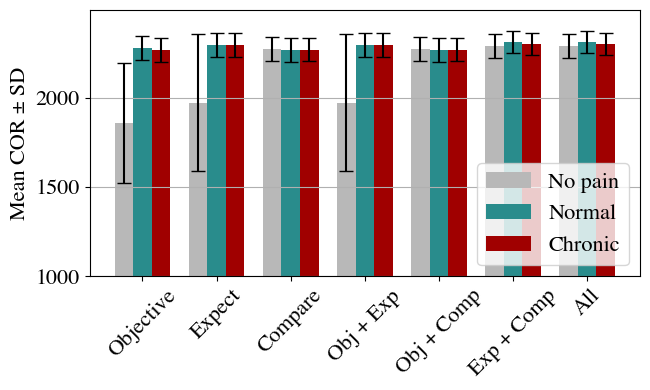

In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times'],
    'xtick.labelsize': axis_labels_font_size,  # Size of numbers on x-axis
    'ytick.labelsize': axis_labels_font_size   # Size of numbers on y-axis
})
# Prepare grouped data: {category: {pain_model: (mean, std, alpha, w4)}}
grouped_results = {}

for series in list_of_best_pandas_series:
    w1, w2, w3 = series["w1"], series["w2"], series["w3"]
    if w1 > 0 and w2 == 0 and w3 == 0:
        category = "Objective"
    elif w1 == 0 and w2 > 0 and w3 == 0:
        category = "Expect"
    elif w1 == 0 and w2 == 0 and w3 > 0:
        category = "Compare"
    elif w1 > 0 and w2 > 0 and w3 == 0:
        category = "Obj + Exp"
    elif w1 > 0 and w2 == 0 and w3 > 0:
        category = "Obj + Comp"
    elif w1 == 0 and w2 > 0 and w3 > 0:
        category = "Exp + Comp"
    elif w1 > 0 and w2 > 0 and w3 > 0:
        category = "All"
    else:
        continue

    if series["w4"] == 0:
        pain_model = "No pain"
    else:
        pain_model = series["pain_model"].capitalize()  # Normal or Chronic

    grouped_results.setdefault(category, {})[pain_model] = (
        series["mean"], series["std"], series["alpha"], series["w4"]
    )

# Plot settings
ordered_categories = ["Objective", "Expect", "Compare", "Obj + Exp", "Obj + Comp", "Exp + Comp", "All"]
pain_models = ["No pain", "Normal", "Chronic"]
colors = [no_pain_color, normal_pain_color, chronic_pain_color]

x = np.arange(len(ordered_categories))
width = 0.25

fig, ax = plt.subplots(figsize=(6.6, 4))

max_height = 0  # for fixed y position of labels

for i, (pain_model, color) in enumerate(zip(pain_models, colors)):
    means, stds = [], []

    for cat in ordered_categories:
        value = grouped_results.get(cat, {}).get(pain_model, (np.nan, np.nan, None, None))
        means.append(value[0])
        stds.append(value[1])
        if not np.isnan(value[0]) and value[0] + value[1] > max_height:
            max_height = value[0] + value[1]

    bars = ax.bar(x + i * width, means, width, label=pain_model, color=color, yerr=stds, capsize=5)

    # Add alpha and w4 inside bars at fixed position
    fixed_y = max_height * 0.4  # slightly above lower third

# Axis & Legend
ax.set_xticks(x + width)
ax.set_xticklabels(ordered_categories, rotation=45, fontsize=axis_labels_font_size)
ax.set_ylabel("Mean COR ± SD", fontsize=axis_labels_font_size)
#ax.set_title("Best performing agent from each reward category across pain conditions", fontsize=title_font_size)
ax.legend(fontsize=label_font_size, loc="lower right")
ax.grid(True, axis='y')

# Set y-axis to start from 1000
ax.set_ylim(bottom=1000)


plt.tight_layout()

output_dir = root_folder + experiment + "/" + plot_save_directory

os.makedirs(output_dir, exist_ok=True)

path = output_dir + "/performance_plot_" + experiment + ".png"
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

In [35]:
df_best = pd.DataFrame(list_of_best_pandas_series).drop(columns=["experiment_name"])
df_best.loc[df_best["w4"] == 0, "pain_model"] = "no"
df_best.to_csv("best_performing_agents.csv", index=False)
print(df_best)

        alpha   roh  epsilon pain_model   w1   w2   w3   w4         mean  \
44880     0.9  0.00     0.10         no  0.9  0.0  0.0  0.0  1858.570000   
91127     0.7  0.00     0.01     normal  0.1  0.0  0.0  1.0  2279.463333   
5246      0.9  0.00     0.01    chronic  0.1  0.0  0.0  0.1  2266.293333   
91107     0.7  0.00     0.01         no  0.0  0.9  0.0  0.0  1973.136667   
91104     0.7  0.00     0.01     normal  0.0  0.7  0.0  0.7  2295.606667   
5217      0.9  0.00     0.01    chronic  0.0  0.3  0.0  0.3  2294.573333   
184620    0.9  0.70     0.01         no  0.0  0.0  0.9  0.0  2272.173333   
140228    0.9  0.70     0.01    chronic  0.0  0.0  1.0  0.1  2270.230000   
145979    0.7  0.05     0.01     normal  0.0  0.0  0.5  0.9  2269.336667   
91254     0.7  0.00     0.01         no  0.5  0.9  0.0  0.0  1973.136667   
91153     0.7  0.00     0.01     normal  0.1  0.7  0.0  0.7  2295.606667   
5429      0.9  0.00     0.01    chronic  0.9  0.3  0.0  0.7  2295.043333   
50632     0.

In [36]:
def generate_latex_table_row(df_table):
    pain_dict = {"no": "No pain", "normal": "Normal pain", "chronic": "Chronic pain"}
    for index, row in df_table.iterrows():
        cur_pain_model = pain_dict[row["pain_model"]]
        print(
            f"& {cur_pain_model} & "
            f"${row['w1']}$ & "
            f"${row['w2']}$ & "
            f"${row['w3']}$ & "
            f"${row['w4']}$ & "
            f"{f'${row["roh"]}$' if row['w3'] != 0 else '\\textsc{{NA}}'} & "
            f"${row['epsilon']}$ & "
            f"${row['alpha']}$ & "
            f"${round(row['mean'], 2)}$ & "
            f"${round(row['std'], 2)}$ \\\\"
        )


In [37]:
generate_latex_table_row(df_best)

& No pain & $0.9$ & $0.0$ & $0.0$ & $0.0$ & \textsc{{NA}} & $0.1$ & $0.9$ & $1858.57$ & $338.72$ \\
& Normal pain & $0.1$ & $0.0$ & $0.0$ & $1.0$ & \textsc{{NA}} & $0.01$ & $0.7$ & $2279.46$ & $69.27$ \\
& Chronic pain & $0.1$ & $0.0$ & $0.0$ & $0.1$ & \textsc{{NA}} & $0.01$ & $0.9$ & $2266.29$ & $68.5$ \\
& No pain & $0.0$ & $0.9$ & $0.0$ & $0.0$ & \textsc{{NA}} & $0.01$ & $0.7$ & $1973.14$ & $384.97$ \\
& Normal pain & $0.0$ & $0.7$ & $0.0$ & $0.7$ & \textsc{{NA}} & $0.01$ & $0.7$ & $2295.61$ & $65.69$ \\
& Chronic pain & $0.0$ & $0.3$ & $0.0$ & $0.3$ & \textsc{{NA}} & $0.01$ & $0.9$ & $2294.57$ & $65.98$ \\
& No pain & $0.0$ & $0.0$ & $0.9$ & $0.0$ & $0.7$ & $0.01$ & $0.9$ & $2272.17$ & $69.09$ \\
& Chronic pain & $0.0$ & $0.0$ & $1.0$ & $0.1$ & $0.7$ & $0.01$ & $0.9$ & $2270.23$ & $67.0$ \\
& Normal pain & $0.0$ & $0.0$ & $0.5$ & $0.9$ & $0.05$ & $0.01$ & $0.7$ & $2269.34$ & $67.69$ \\
& No pain & $0.5$ & $0.9$ & $0.0$ & $0.0$ & \textsc{{NA}} & $0.01$ & $0.7$ & $1973.14$ & $384.97$

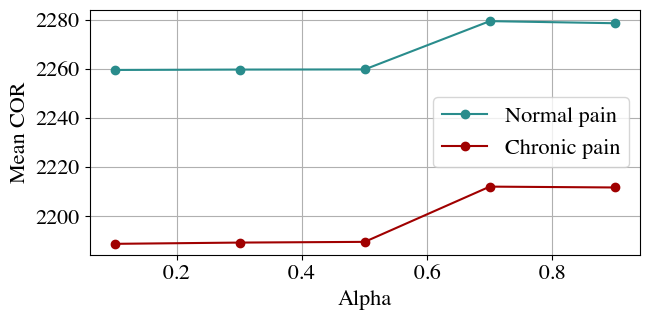

In [38]:
#fixed_for_alpha = df[(df["w1"] == 0.1) & (df["w2"] == 0.7) & (df["w3"] == 0) & (df["w4"] == 0.7) & (df["epsilon"] == 0.01)]


# Filter data
normal_df = df[(df["pain_model"] == "normal") & (df["w1"] == 0.1) & (df["w2"] == 0) & (df["w3"] == 0) & (df["w4"] == 1) & (df["epsilon"] == 0.01)].sort_values("alpha")
chronic_df = df[(df["pain_model"] == "chronic") & (df["w1"] == 0.7) & (df["w2"] == 0) & (df["w3"] == 0) & (df["w4"] == 0.9) & (df["epsilon"] == 0.01)].sort_values("alpha")

# Plot
fig, ax = plt.subplots(figsize=(6.6, 3.3))

ax.plot(normal_df["alpha"], normal_df["mean"], marker='o', label="Normal pain", color=normal_pain_color)
ax.plot(chronic_df["alpha"], chronic_df["mean"], marker='o', label="Chronic pain", color=chronic_pain_color)

ax.set_xlabel("Alpha", fontsize=axis_labels_font_size)
ax.set_ylabel("Mean COR", fontsize=axis_labels_font_size)
#ax.set_title("Effect of learning rate under normal and chronic pain", fontsize=title_font_size)
ax.grid(True)
ax.legend(fontsize=label_font_size, loc="center right")

# Extract metadata
n_row = normal_df.iloc[0]
c_row = chronic_df.iloc[0]

# Normal Pain info
n_info = (
    f"Normal pain → w1: {n_row['w1']}, w2: {n_row['w2']}, w3: {n_row['w3']}, w4: {n_row['w4']}, "
    f"epsilon: {n_row['epsilon']}"
)

# Chronic Pain info
c_info = (
    f"Chronic pain → w1: {c_row['w1']}, w2: {c_row['w2']}, w3: {c_row['w3']}, w4: {c_row['w4']}, "
    f"epsilon: {c_row['epsilon']}"
)

# Full caption text (multi-line)
full_caption = f"{n_info}\n{c_info}"

# Adjust layout to fit multi-line caption
fig.subplots_adjust(bottom=0.25)
#fig.text(0.5, 0.05, full_caption, ha='center', va='bottom', fontsize=caption_font_size, linespacing=1.5)

plt.tight_layout()
plt.savefig(root_folder + experiment + "/" + plot_save_directory + "/" + "alpha_vs_reward_stationary_obj.png", dpi=300)
plt.show()

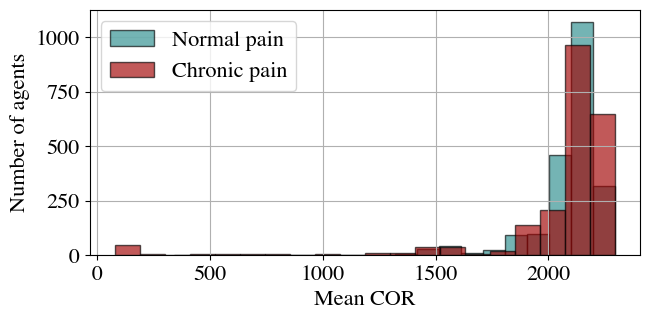

Mean reward (Normal Pain, Obj + Exp): 2082.43
Mean reward (Chronic Pain, Obj + Exp): 2032.70


In [39]:
# Filter: Normal pain agents with Objective + Expect + Pain (no Compare)
normal_objexp_pain = df[
    (df["pain_model"] == "normal") &
    (df["w1"] > 0) & (df["w2"] > 0) &
    (df["w3"] == 0) & (df["w4"] > 0)
]

# Filter: All chronic pain agents
chronic_all = df[
    (df["pain_model"] == "chronic") &
    (df["w1"] > 0) & (df["w2"] > 0) &
    (df["w3"] == 0) & (df["w4"] > 0)
]

# Extract cumulative objective rewards
normal_rewards = normal_objexp_pain["mean"]
chronic_rewards = chronic_all["mean"]

# Plot histogram
plt.figure(figsize=(6.6, 3.3))
bins = 20

plt.hist(normal_rewards, bins=bins, alpha=0.65, label="Normal pain", color=normal_pain_color, edgecolor='black')
plt.hist(chronic_rewards, bins=bins, alpha=0.65, label="Chronic pain", color=chronic_pain_color, edgecolor='black')

# Labels & Title
plt.xlabel("Mean COR", fontsize=axis_labels_font_size)
plt.ylabel("Number of agents", fontsize=axis_labels_font_size)
#plt.title("Reward distribution: normal pain vs chronic pain in Objective+Expect", fontsize=title_font_size)
plt.legend(fontsize=label_font_size)
plt.grid(True)

plt.tight_layout()
plt.savefig(root_folder + experiment + "/" + plot_save_directory + "/" + "reward_distribution_obj_exp_pain.png", dpi=300)
plt.show()

# Calculate mean of the means
normal_mean = normal_rewards.mean()
chronic_mean = chronic_rewards.mean()

print(f"Mean reward (Normal Pain, Obj + Exp): {normal_mean:.2f}")
print(f"Mean reward (Chronic Pain, Obj + Exp): {chronic_mean:.2f}")


In [40]:
visualizer = get_experiment_visualizer(best_obj_exp_with_w4)
visualizer.save_selected_metrics_plot(["Cum. well-being", "Well-being", "Subjective pain"], "metrics_np_stationary.png", "Objective+Expect, Normal Pain")
visualizer = get_experiment_visualizer(best_obj_exp_with_w4_other)
visualizer.save_selected_metrics_plot(["Cum. well-being", "Well-being", "Subjective pain"], "metrics_cp_stationary.png", "Objective+Expect, Chronic Pain")